In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### Train-Test-Val split by index

In [37]:
wd = '/grid/siepel/home_norepl/mo/dom_adapt/bkgd_sims/fea_dfs'
handle = 'reg_neu_tru'
fea_memmap = np.load(f'{wd}/{handle}_fea.npy', mmap_mode='r')
meta = np.load(f'{wd}/{handle}_meta.npy')

print(fea_memmap.shape, meta.shape)

(250000, 3, 127, 127) (250000, 5)


In [38]:
idx_arr = np.arange(fea_memmap.shape[0])

In [39]:
np.random.shuffle(idx_arr)

In [40]:
test_size = 20000
val_size = 5000

In [41]:
val_idx = idx_arr[:val_size]
test_idx = idx_arr[val_size:(val_size+test_size)]
train_idx = idx_arr[(val_size+test_size):]

In [42]:
train_idx.size, test_idx.size, val_idx.size

(225000, 20000, 5000)

In [43]:
np.unique(np.concatenate((train_idx, test_idx, val_idx))).shape

(250000,)

In [44]:
np.savez(f'{wd}/{handle}_splitIdx.npz', TRAIN=train_idx, TEST=test_idx, VAL=val_idx)

In [10]:
fea_memmap[12345:12350].shape

(5, 3, 127, 127)

In [11]:
np.moveaxis(fea_memmap[12345:12350], 1, -1).shape

(5, 127, 127, 3)

In [12]:
np.moveaxis(fea_memmap[12345:12350], 1, -1)[0]

memmap([[[    2, 11068,     0],
         [    1, 13326,     0],
         [    1, 18497,     0],
         ...,
         [    0, 25099,     0],
         [    0, 25100,     0],
         [    0, 25104,     0]],

        [[    1, 13326,     0],
         [    3,  2258,     0],
         [    2,  7429,     0],
         ...,
         [    0, 14030,     0],
         [    0, 14031,     0],
         [    0, 14035,     0]],

        [[    1, 18497,     0],
         [    2,  7429,     0],
         [    4,  5171,     0],
         ...,
         [    0, 11772,     0],
         [    0, 11773,     0],
         [    0, 11777,     0]],

        ...,

        [[    0, 25099,     0],
         [    0, 14030,     0],
         [    0, 11772,     0],
         ...,
         [  126,     0,    57],
         [  125,     1,    57],
         [  124,     5,    57]],

        [[    0, 25100,     0],
         [    0, 14031,     0],
         [    0, 11773,     0],
         ...,
         [  125,     1,    57],
         [  

In [17]:
eg = 11791

In [18]:
np.max(fea_memmap[eg, 0]), np.max(fea_memmap[eg, 1]), np.max(fea_memmap[eg, 2])

(128, 32164, 22)

In [19]:
np.min(fea_memmap[eg, 0]), np.min(fea_memmap[eg, 1]), np.min(fea_memmap[eg, 2])

(0, 0, 0)

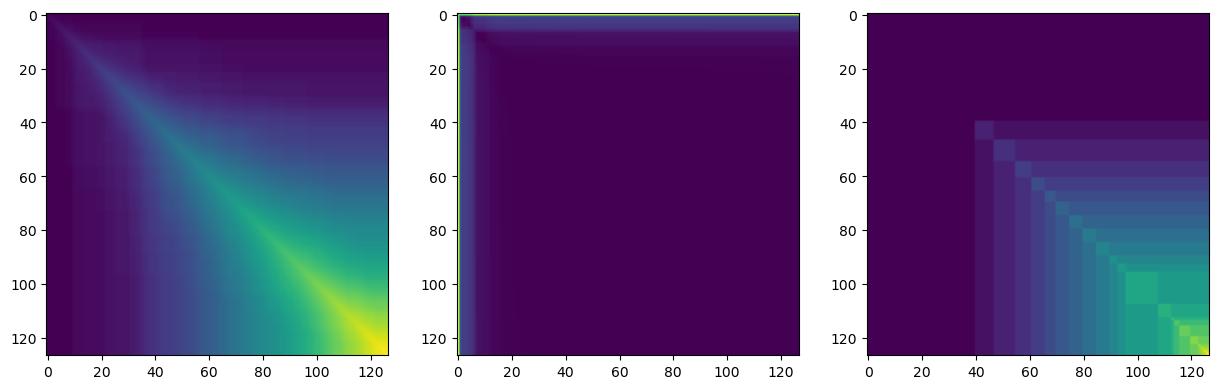

In [20]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

ax1.imshow(fea_memmap[eg][0])
ax2.imshow(fea_memmap[eg][1])
ax3.imshow(fea_memmap[eg][2])